In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from pandas.plotting import scatter_matrix
from keras.losses import mse
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers import Activation
from numpy.linalg import norm
import random
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import json

%matplotlib inline

Using TensorFlow backend.


In [60]:
df_atmes = pd.read_csv("americanToadMes.csv")
df_atmes.drop('Unnamed: 0',axis=1,inplace=True)
#df_spmes = pd.read_csv("springPeeperMes.csv")
#df_spmes.drop('Unnamed: 0',axis=1,inplace=True)
#df_atest = pd.read_csv("americanToadPadraoEstacao.csv")
#df_gfest = pd.read_csv("greenFrogPadraoEstacao.csv")
#df_gfmes = pd.read_csv("greenFrogPadraoMes.csv")
#df_spest = pd.read_csv("springPeeperPadraoEstacao.csv")

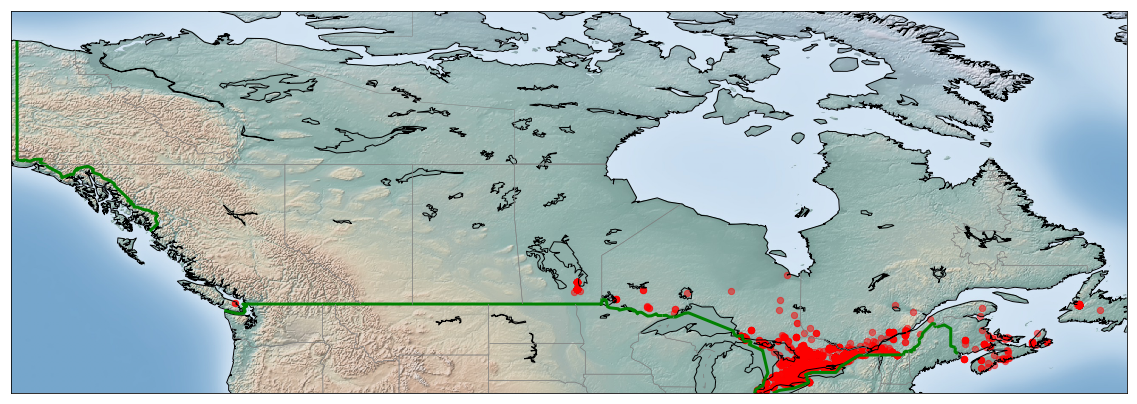

In [62]:
lat = df_atmes['lat']*180/np.pi
lng = df_atmes['lng']*180/np.pi
lon_min=-141.5
lon_max=-54
lat_min=42
lat_max=72
fig = plt.figure(figsize=(20, 30))
bm = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)
bm.shadedrelief()
bm.drawcoastlines(color='black')
bm.drawcountries(color='green',linewidth=3)
bm.drawstates(color='gray')
bm.scatter(lng, lat, latlon=True, s=40, c='red', alpha=0.5)
plt.savefig('aparecAmericanToad.pdf', format="pdf", bbox_inches='tight')
plt.show()

## Padronizando com o RobustScaler + MinMaxScaler

In [3]:
# O robust é bom por não ser enganado pelos outliers na média e variância
origin = df_atmes.copy()
rbs = RobustScaler()
mms = MinMaxScaler()
cols = df_atmes.columns
df_atmes = rbs.fit_transform(df_atmes)
df_atmes = mms.fit_transform(df_atmes)
df_atmes = pd.DataFrame(df_atmes, columns=cols)

In [91]:
df_atmes.head(10)

date       lat       lng  thunder  snow  minhumidity  \
0  0.454545  0.759298  0.000000      0.0   0.0     0.479167   
1  0.454545  0.759298  0.000000      0.0   0.0     0.437500   
2  0.363636  0.478079  0.849911      0.0   0.0     0.333333   
3  0.818182  0.456111  0.848086      0.0   0.0     0.489583   
4  0.363636  0.468840  0.853009      0.0   0.0     0.291667   
5  0.545455  0.477393  0.839897      0.0   0.0     0.500000   
6  0.363636  0.466153  0.845852      0.0   0.0     0.760417   
7  0.272727  0.882953  0.376101      0.0   0.0     0.052083   
8  0.272727  0.882953  0.376101      0.0   0.0     0.031250   
9  0.272727  0.882953  0.376101      0.0   0.0     0.052083   

   coolingdegreedays  maxdewptm  heatingdegreedays  meanpressurem    ...     \
0                0.0   0.588235           0.052632       0.498859    ...      
1                0.0   0.627451           0.157895       0.542833    ...      
2                0.0   0.509804           0.276316       0.586600    ...      
3                0.0   0.529412           0.263158       0.156607    ...      
4                0.0   0.470588           0.315789       0.632856    ...      
5                0.4   0.803922           0.000000       0.452603    ...      
6                0.0   0.470588           0.302632       0.557561    ...      
7                0.0   0.313725           0.289474       0.364032    ...      
8                0.0   0.254902           0.236842       0.519602    ...      
9                0.0   0.372549           0.039474       0.379589    ...      

   meanwindspdm  maxpressurem  hail  meandewptm  maxwspdm   precipm  \
0      0.009524      0.469388   0.0    0.692308     0.010  0.000000   
1      0.047619      0.612245   0.0    0.711538     0.075  0.000000   
2      0.047619      0.591837   0.0    0.557692     0.075  0.001409   
3      0.209524      0.163265   0.0    0.576923     0.185  0.014085   
4      0.095238      0.632653   0.0    0.500000     0.085  0.028171   
5      0.228571      0.448980   0.0    0.884615     0.185  0.000000   
6      0.295238      0.551020   0.0    0.576923     0.215  0.000000   
7      0.180952      0.387755   0.0    0.384615     0.240  0.000000   
8      0.114286      0.530612   0.0    0.346154     0.140  0.000000   
9      0.266667      0.367347   0.0    0.461538     0.280  0.000000   

   meantempm  meanwdird  maxhumidity  mintempm  
0   0.740741   0.000000     0.671053  0.775862  
1   0.666667   0.108033     0.973684  0.672414  
2   0.574074   0.166205     1.000000  0.534483  
3   0.574074   0.889197     0.934211  0.655172  
4   0.518519   0.531856     0.776316  0.568966  
5   0.851852   0.606648     0.894737  0.896552  
6   0.537037   0.110803     0.934211  0.637931  
7   0.555556   0.000000     0.565789  0.568966  
8   0.592593   0.000000     0.197368  0.568966  
9   0.740741   0.000000     0.065789  0.758621  

[10 rows x 28 columns]

In [92]:
origin.head(10)

date       lat       lng  thunder  snow  minhumidity  coolingdegreedays  \
0     6  0.855986 -2.162174      0.0   0.0         50.0                0.0   
1     6  0.855986 -2.162174      0.0   0.0         46.0                0.0   
2     5  0.810612 -1.106800      0.0   0.0         36.0                0.0   
3    10  0.807068 -1.109066      0.0   0.0         51.0                0.0   
4     5  0.809122 -1.102953      0.0   0.0         32.0                0.0   
5     7  0.810502 -1.119235      0.0   0.0         52.0                8.0   
6     5  0.808688 -1.111839      0.0   0.0         77.0                0.0   
7     4  0.875937 -1.695151      0.0   0.0          9.0                0.0   
8     4  0.875937 -1.695151      0.0   0.0          7.0                0.0   
9     4  0.875937 -1.695151      0.0   0.0          9.0                0.0   

   maxdewptm  heatingdegreedays  meanpressurem    ...     meanwindspdm  \
0       10.0                4.0        1016.50    ...              1.0   
1       12.0               12.0        1018.62    ...              5.0   
2        6.0               21.0        1020.73    ...              5.0   
3        7.0               20.0        1000.00    ...             22.0   
4        4.0               24.0        1022.96    ...             10.0   
5       21.0                0.0        1014.27    ...             24.0   
6        4.0               23.0        1019.33    ...             31.0   
7       -4.0               22.0        1010.00    ...             19.0   
8       -7.0               18.0        1017.50    ...             12.0   
9       -1.0                3.0        1010.75    ...             28.0   

   maxpressurem  hail  meandewptm  maxwspdm  precipm  meantempm  meanwdird  \
0        1017.0   0.0         9.0       2.0      0.0       16.0       -1.0   
1        1024.0   0.0        10.0      15.0      0.0       12.0       38.0   
2        1023.0   0.0         2.0      15.0      0.2        7.0       59.0   
3        1002.0   0.0         3.0      37.0      2.0        7.0      320.0   
4        1025.0   0.0        -1.0      17.0      4.0        4.0      191.0   
5        1016.0   0.0        19.0      37.0      0.0       22.0      218.0   
6        1021.0   0.0         3.0      43.0      0.0        5.0       39.0   
7        1013.0   0.0        -7.0      48.0      0.0        6.0       -1.0   
8        1020.0   0.0        -9.0      28.0      0.0        8.0       -1.0   
9        1012.0   0.0        -3.0      56.0      0.0       16.0       -1.0   

   maxhumidity  mintempm  
0         75.0      12.0  
1         98.0       6.0  
2        100.0      -2.0  
3         95.0       5.0  
4         83.0       0.0  
5         92.0      19.0  
6         95.0       4.0  
7         67.0       0.0  
8         39.0       0.0  
9         29.0      11.0  

[10 rows x 28 columns]

# Feature Selection

In [4]:
def classifica_dict(d, reverso):
    feature = []
    valor = []
    for b in sorted(d, key = d.get,reverse=reverso):
        feature.append(b)
        valor.append(d[b])
    return feature, valor

In [5]:
def interquartile_ranking(data):
    ir = {}
    zeros = []
    for c in data.columns:
        inter = data[c].quantile(q=0.75) - data[c].quantile(q=0.25)
        if (inter == 0):
            zeros.append(c)
        else:
            ir[c] = inter 
    return classifica_dict(ir,reverso=False), zeros

In [6]:
ir, zeros = interquartile_ranking(df_atmes)
ir

(['lng',
  'maxwspdm',
  'meanwindspdm',
  'date',
  'maxtempm',
  'meantempm',
  'minwspdm',
  'mintempm',
  'lat',
  'maxdewptm',
  'heatingdegreedays',
  'maxpressurem',
  'mindewptm',
  'meanpressurem',
  'maxhumidity',
  'minpressurem',
  'meandewptm',
  'humidity',
  'minhumidity',
  'gdegreedays',
  'meanwdird'],
 [0.031597279692543,
  0.05499999999999999,
  0.057142857142857134,
  0.09090909090909094,
  0.11764705882352944,
  0.12962962962962965,
  0.1313131313131313,
  0.13793103448275867,
  0.1513527625653154,
  0.1568627450980392,
  0.15789473684210528,
  0.16326530612244894,
  0.16666666666666674,
  0.17071147064924203,
  0.1842105263157895,
  0.19148936170212771,
  0.1923076923076923,
  0.25,
  0.27083333333333326,
  0.4,
  0.6481994459833795])

In [7]:
zeros

['thunder', 'snow', 'coolingdegreedays', 'rain', 'fog', 'hail', 'precipm']

In [8]:
# Elimina as features com intervalo entre quartis zerado
for c in zeros:
    df_atmes.drop(c,axis=1,inplace=True)

# Arquiteturas de Redes Autoencoders

In [9]:
# Separa as base de treino e teste
X_trainAtMes, X_testAtMes = train_test_split(df_atmes, test_size=0.30, random_state=42)

In [10]:
batch = len(df_atmes)//10
batch

367

In [11]:
attest_dim = len(X_testAtMes)//10
attest_dim

110

In [12]:
input_dim = len(df_atmes.columns)
input_dim

21

## Arquitetura 1: Sem redução, apenas Dropout

In [21]:
# Outra tentativa
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
x = Dropout(0.3)(entrada)
x = Dense(input_dim,activation="tanh")(x)
decoded = Dense(input_dim,activation="sigmoid")(x)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
# Cria o modelo para a rede anteriormente montada
ae1 = Model(entrada,decoded)

In [23]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
ae1.compile(optimizer='adam', loss='mse')

In [24]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history_ae1 = ae1.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_split=0.3,
                callbacks=[es])

Instructions for updating:
Use tf.cast instead.
Train on 1800 samples, validate on 772 samples
Epoch 1/10000
1800/1800 [==============================] - 3s 2ms/step - loss: 0.1038 - val_loss: 0.0983
Epoch 2/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0971 - val_loss: 0.0901
Epoch 3/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0897 - val_loss: 0.0826
Epoch 4/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0829 - val_loss: 0.0757
Epoch 5/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0770 - val_loss: 0.0695
Epoch 6/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0708 - val_loss: 0.0637
Epoch 7/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0658 - val_loss: 0.0584
Epoch 8/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0607 - val_loss: 0.0534
Epoch 9/10000
1800/1800 [==============================] -

1800/1800 [==============================] - 0s 13us/step - loss: 0.0172 - val_loss: 0.0146
Epoch 75/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0174 - val_loss: 0.0144
Epoch 76/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0173 - val_loss: 0.0143
Epoch 77/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0170 - val_loss: 0.0142
Epoch 78/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0170 - val_loss: 0.0141
Epoch 79/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0170 - val_loss: 0.0140
Epoch 80/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0168 - val_loss: 0.0139
Epoch 81/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0167 - val_loss: 0.0138
Epoch 82/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0165 - val_loss: 0.0137
Epoch 83/10000
1800/1800 [==========================

1800/1800 [==============================] - 0s 16us/step - loss: 0.0134 - val_loss: 0.0090
Epoch 151/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0132 - val_loss: 0.0090
Epoch 152/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0133 - val_loss: 0.0090
Epoch 153/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0135 - val_loss: 0.0089
Epoch 154/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0134 - val_loss: 0.0089
Epoch 155/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0133 - val_loss: 0.0089
Epoch 156/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0132 - val_loss: 0.0089
Epoch 157/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0133 - val_loss: 0.0089
Epoch 158/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0130 - val_loss: 0.0088
Epoch 159/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 11us/step - loss: 0.0121 - val_loss: 0.0076
Epoch 227/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0124 - val_loss: 0.0076
Epoch 228/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0123 - val_loss: 0.0076
Epoch 229/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0126 - val_loss: 0.0076
Epoch 230/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0121 - val_loss: 0.0076
Epoch 231/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0122 - val_loss: 0.0076
Epoch 232/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0124 - val_loss: 0.0076
Epoch 233/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0121 - val_loss: 0.0076
Epoch 234/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0125 - val_loss: 0.0075
Epoch 235/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 13us/step - loss: 0.0119 - val_loss: 0.0071
Epoch 303/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0118 - val_loss: 0.0071
Epoch 304/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0119 - val_loss: 0.0071
Epoch 305/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0119 - val_loss: 0.0070
Epoch 306/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0120 - val_loss: 0.0070
Epoch 307/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0119 - val_loss: 0.0070
Epoch 308/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0121 - val_loss: 0.0070
Epoch 309/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0118 - val_loss: 0.0071
Epoch 310/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0115 - val_loss: 0.0071
Epoch 311/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 16us/step - loss: 0.0115 - val_loss: 0.0068
Epoch 379/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0117 - val_loss: 0.0068
Epoch 380/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0116 - val_loss: 0.0068
Epoch 381/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0115 - val_loss: 0.0068
Epoch 382/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0117 - val_loss: 0.0068
Epoch 383/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0114 - val_loss: 0.0068
Epoch 384/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0116 - val_loss: 0.0068
Epoch 385/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0115 - val_loss: 0.0068
Epoch 386/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0115 - val_loss: 0.0067
Epoch 387/10000
1800/1800 [==================

1800/1800 [==============================] - 0s 20us/step - loss: 0.0108 - val_loss: 0.0067
Epoch 455/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0116 - val_loss: 0.0067
Epoch 456/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0116 - val_loss: 0.0066
Epoch 457/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0113 - val_loss: 0.0066
Epoch 458/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0117 - val_loss: 0.0066
Epoch 459/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0114 - val_loss: 0.0067
Epoch 460/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0113 - val_loss: 0.0067
Epoch 461/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0116 - val_loss: 0.0067
Epoch 462/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0114 - val_loss: 0.0066
Epoch 463/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 21us/step - loss: 0.0111 - val_loss: 0.0066
Epoch 531/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0112 - val_loss: 0.0066
Epoch 532/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0113 - val_loss: 0.0066
Epoch 533/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0111 - val_loss: 0.0066
Epoch 534/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0115 - val_loss: 0.0066
Epoch 535/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0117 - val_loss: 0.0066
Epoch 536/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0114 - val_loss: 0.0066
Epoch 537/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0114 - val_loss: 0.0066
Epoch 538/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0115 - val_loss: 0.0067
Epoch 539/10000
1800/1800 [=================

Epoch 606/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0112 - val_loss: 0.0066
Epoch 607/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0108 - val_loss: 0.0066
Epoch 608/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0115 - val_loss: 0.0066
Epoch 609/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0113 - val_loss: 0.0066
Epoch 610/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0111 - val_loss: 0.0067
Epoch 611/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0111 - val_loss: 0.0067
Epoch 612/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0115 - val_loss: 0.0066
Epoch 613/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0109 - val_loss: 0.0066
Epoch 614/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0110 - val_loss: 0.0067
Epoch 615/10000
1800/1800 [=

Epoch 682/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0108 - val_loss: 0.0067
Epoch 683/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0111 - val_loss: 0.0066
Epoch 684/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0108 - val_loss: 0.0067
Epoch 685/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0110 - val_loss: 0.0067
Epoch 686/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0108 - val_loss: 0.0067
Epoch 687/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0109 - val_loss: 0.0067
Epoch 688/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0108 - val_loss: 0.0066
Epoch 689/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0110 - val_loss: 0.0066
Epoch 690/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0111 - val_loss: 0.0066
Epoch 691/10000
1800/1800 [=

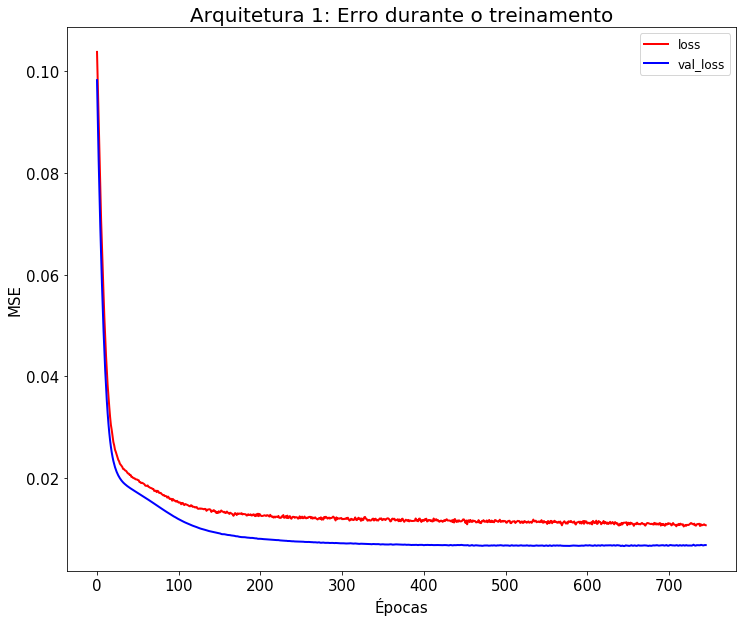

In [25]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history_ae1.history['loss'],color='r',label="loss",linewidth=2)
plt.plot(history_ae1.history['val_loss'],color='b',label="val_loss",linewidth=2)
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Arquitetura 1: Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [26]:
np.min(history_ae1.history['loss'])

0.010391764147724542

In [27]:
np.min(history_ae1.history['val_loss'])

0.0065280728481246705

## Arquitetura 2: Redução e com Dropout

In [28]:
# Arquitetura que o professor falou
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
x = Dropout(0.3)(entrada)
x = Dense(encoding_dim1,activation="relu")(x)
decoded = Dense(input_dim,activation="sigmoid")(x)

In [29]:
# Cria o modelo para a rede anteriormente montada
ae2 = Model(entrada,decoded)

In [30]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
ae2.compile(optimizer='adam', loss='mse')

In [31]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history_ae2 = ae2.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_split=0.3,
                callbacks=[es])

Train on 1800 samples, validate on 772 samples
Epoch 1/10000
1800/1800 [==============================] - 0s 234us/step - loss: 0.0674 - val_loss: 0.0632
Epoch 2/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0654 - val_loss: 0.0611
Epoch 3/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0631 - val_loss: 0.0591
Epoch 4/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0613 - val_loss: 0.0572
Epoch 5/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0594 - val_loss: 0.0555
Epoch 6/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0575 - val_loss: 0.0538
Epoch 7/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0556 - val_loss: 0.0521
Epoch 8/10000
1800/1800 [==============================] - 0s 24us/step - loss: 0.0540 - val_loss: 0.0504
Epoch 9/10000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0523 - val_loss: 0.048

1800/1800 [==============================] - 0s 15us/step - loss: 0.0184 - val_loss: 0.0161
Epoch 78/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0183 - val_loss: 0.0160
Epoch 79/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0184 - val_loss: 0.0160
Epoch 80/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0183 - val_loss: 0.0159
Epoch 81/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0181 - val_loss: 0.0158
Epoch 82/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0180 - val_loss: 0.0157
Epoch 83/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0179 - val_loss: 0.0156
Epoch 84/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0179 - val_loss: 0.0155
Epoch 85/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0180 - val_loss: 0.0154
Epoch 86/10000
1800/1800 [==========================

Epoch 153/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0138 - val_loss: 0.0098
Epoch 154/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0137 - val_loss: 0.0098
Epoch 155/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0137 - val_loss: 0.0097
Epoch 156/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0136 - val_loss: 0.0097
Epoch 157/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0138 - val_loss: 0.0096
Epoch 158/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0137 - val_loss: 0.0096
Epoch 159/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0138 - val_loss: 0.0096
Epoch 160/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0136 - val_loss: 0.0096
Epoch 161/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0135 - val_loss: 0.0095
Epoch 162/10000
1800/1800 [=

Epoch 229/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0125 - val_loss: 0.0083
Epoch 230/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0127 - val_loss: 0.0083
Epoch 231/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0126 - val_loss: 0.0082
Epoch 232/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0126 - val_loss: 0.0082
Epoch 233/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0128 - val_loss: 0.0082
Epoch 234/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0126 - val_loss: 0.0082
Epoch 235/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0127 - val_loss: 0.0082
Epoch 236/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0128 - val_loss: 0.0081
Epoch 237/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0124 - val_loss: 0.0082
Epoch 238/10000
1800/1800 [=

Epoch 305/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0121 - val_loss: 0.0077
Epoch 306/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0123 - val_loss: 0.0077
Epoch 307/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0122 - val_loss: 0.0076
Epoch 308/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0121 - val_loss: 0.0076
Epoch 309/10000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0120 - val_loss: 0.0076
Epoch 310/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0121 - val_loss: 0.0076
Epoch 311/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0119 - val_loss: 0.0076
Epoch 312/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0122 - val_loss: 0.0076
Epoch 313/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0121 - val_loss: 0.0077
Epoch 314/10000
1800/1800 [==

Epoch 381/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0119 - val_loss: 0.0073
Epoch 382/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0073
Epoch 383/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0121 - val_loss: 0.0073
Epoch 384/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0120 - val_loss: 0.0073
Epoch 385/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0120 - val_loss: 0.0073
Epoch 386/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0121 - val_loss: 0.0073
Epoch 387/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0120 - val_loss: 0.0073
Epoch 388/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0120 - val_loss: 0.0073
Epoch 389/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0118 - val_loss: 0.0073
Epoch 390/10000
1800/1800 [=

Epoch 457/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0115 - val_loss: 0.0071
Epoch 458/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0117 - val_loss: 0.0072
Epoch 459/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0119 - val_loss: 0.0071
Epoch 460/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0120 - val_loss: 0.0071
Epoch 461/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0118 - val_loss: 0.0071
Epoch 462/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0118 - val_loss: 0.0071
Epoch 463/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0116 - val_loss: 0.0071
Epoch 464/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0119 - val_loss: 0.0071
Epoch 465/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0117 - val_loss: 0.0071
Epoch 466/10000
1800/1800 [=

Epoch 533/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0116 - val_loss: 0.0070
Epoch 534/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0114 - val_loss: 0.0070
Epoch 535/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0116 - val_loss: 0.0070
Epoch 536/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0119 - val_loss: 0.0070
Epoch 537/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0114 - val_loss: 0.0070
Epoch 538/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0120 - val_loss: 0.0069
Epoch 539/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0117 - val_loss: 0.0070
Epoch 540/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0116 - val_loss: 0.0070
Epoch 541/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0117 - val_loss: 0.0070
Epoch 542/10000
1800/1800 [=

Epoch 609/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0115 - val_loss: 0.0069
Epoch 610/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0111 - val_loss: 0.0069
Epoch 611/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0112 - val_loss: 0.0070
Epoch 612/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0114 - val_loss: 0.0070
Epoch 613/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0113 - val_loss: 0.0069
Epoch 614/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0114 - val_loss: 0.0069
Epoch 615/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0112 - val_loss: 0.0070
Epoch 616/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0116 - val_loss: 0.0069
Epoch 617/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0114 - val_loss: 0.0068
Epoch 618/10000
1800/1800 [=

Epoch 685/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0109 - val_loss: 0.0071
Epoch 686/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0107 - val_loss: 0.0071
Epoch 687/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0106 - val_loss: 0.0072
Epoch 688/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0111 - val_loss: 0.0070
Epoch 689/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0107 - val_loss: 0.0070
Epoch 690/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0108 - val_loss: 0.0071
Epoch 691/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0108 - val_loss: 0.0070
Epoch 692/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0106 - val_loss: 0.0070
Epoch 693/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0105 - val_loss: 0.0071
Epoch 694/10000
1800/1800 [=

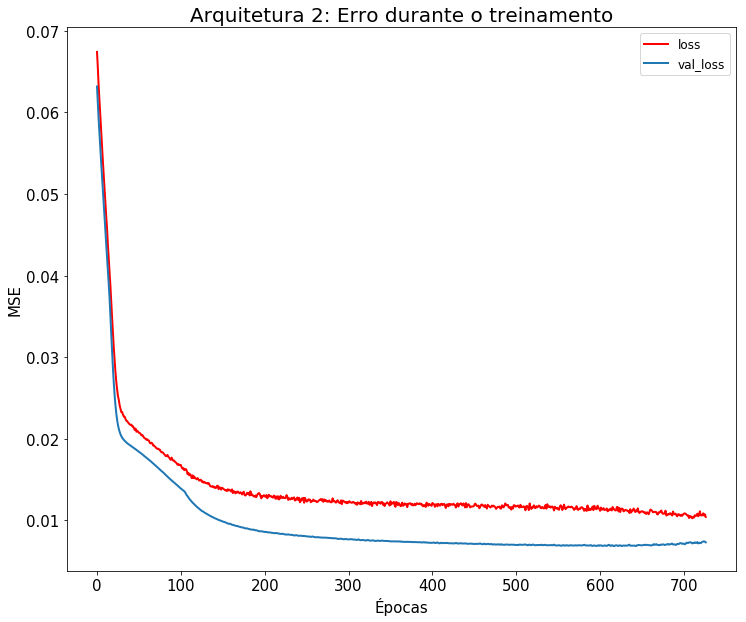

In [32]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history_ae2.history['loss'],color='r',label="loss",linewidth=2)
plt.plot(history_ae2.history['val_loss'],label="val_loss",linewidth=2)
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Arquitetura 2: Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [33]:
np.min(history_ae2.history['loss'])

0.010252375736729139

In [34]:
np.min(history_ae2.history['val_loss'])

0.006846787383263555

## Arquitetura 3: Com BatchNormalization e Relu

In [35]:
# Rede com duas camadas decodificadas e Relu e batch
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
batch1 = BatchNormalization()(entrada)
encoded1 = Dense(encoding_dim1,activation="relu")(batch1)
dp2 = Dropout(0.1)(encoded1) 
encoded2 = Dense(encoding_dim1,activation="relu")(dp2)
batch2 = BatchNormalization()(encoded2)
decoded = Dense(input_dim,activation="sigmoid")(batch2)

In [36]:
# Cria o modelo para a rede anteriormente montada
ae3 = Model(entrada,decoded)

In [37]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
ae3.compile(optimizer='adam', loss='mse')

In [38]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history_ae3 = ae3.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_split=0.3,
                callbacks=[es])

Train on 1800 samples, validate on 772 samples
Epoch 1/10000
1800/1800 [==============================] - 2s 851us/step - loss: 0.1061 - val_loss: 0.0996
Epoch 2/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.1026 - val_loss: 0.0964
Epoch 3/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0997 - val_loss: 0.0934
Epoch 4/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0963 - val_loss: 0.0907
Epoch 5/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0941 - val_loss: 0.0882
Epoch 6/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0913 - val_loss: 0.0858
Epoch 7/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0888 - val_loss: 0.0836
Epoch 8/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0866 - val_loss: 0.0815
Epoch 9/10000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0843 - val_loss: 0.079

1800/1800 [==============================] - 0s 18us/step - loss: 0.0123 - val_loss: 0.0113
Epoch 78/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0124 - val_loss: 0.0111
Epoch 79/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0120 - val_loss: 0.0109
Epoch 80/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0119 - val_loss: 0.0107
Epoch 81/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0118 - val_loss: 0.0105
Epoch 82/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0116 - val_loss: 0.0103
Epoch 83/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0114 - val_loss: 0.0102
Epoch 84/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0114 - val_loss: 0.0100
Epoch 85/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0112 - val_loss: 0.0099
Epoch 86/10000
1800/1800 [==========================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0059 - val_loss: 0.0043
Epoch 154/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0062 - val_loss: 0.0043
Epoch 155/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0059 - val_loss: 0.0042
Epoch 156/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0059 - val_loss: 0.0042
Epoch 157/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0060 - val_loss: 0.0042
Epoch 158/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0059 - val_loss: 0.0041
Epoch 159/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0059 - val_loss: 0.0041
Epoch 160/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0058 - val_loss: 0.0041
Epoch 161/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0059 - val_loss: 0.0040
Epoch 162/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 17us/step - loss: 0.0049 - val_loss: 0.0030
Epoch 230/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0050 - val_loss: 0.0030
Epoch 231/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0048 - val_loss: 0.0030
Epoch 232/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0050 - val_loss: 0.0030
Epoch 233/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0030
Epoch 234/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0049 - val_loss: 0.0030
Epoch 235/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0049 - val_loss: 0.0030
Epoch 236/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0048 - val_loss: 0.0030
Epoch 237/10000
1800/1800 [==============================] - 0s 25us/step - loss: 0.0048 - val_loss: 0.0030
Epoch 238/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 16us/step - loss: 0.0048 - val_loss: 0.0027
Epoch 306/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0046 - val_loss: 0.0027
Epoch 307/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0047 - val_loss: 0.0027
Epoch 308/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0047 - val_loss: 0.0027
Epoch 309/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0045 - val_loss: 0.0027
Epoch 310/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0046 - val_loss: 0.0027
Epoch 311/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0047 - val_loss: 0.0027
Epoch 312/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0044 - val_loss: 0.0027
Epoch 313/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0044 - val_loss: 0.0027
Epoch 314/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 22us/step - loss: 0.0046 - val_loss: 0.0025
Epoch 382/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 383/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 384/10000
1800/1800 [==============================] - 0s 28us/step - loss: 0.0043 - val_loss: 0.0025
Epoch 385/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 386/10000
1800/1800 [==============================] - 0s 26us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 387/10000
1800/1800 [==============================] - 0s 25us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 388/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 389/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 390/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0044 - val_loss: 0.0023
Epoch 458/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0043 - val_loss: 0.0023
Epoch 459/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0044 - val_loss: 0.0023
Epoch 460/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0042 - val_loss: 0.0023
Epoch 461/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0023
Epoch 462/10000
1800/1800 [==============================] - 0s 27us/step - loss: 0.0043 - val_loss: 0.0023
Epoch 463/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0044 - val_loss: 0.0023
Epoch 464/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0044 - val_loss: 0.0023
Epoch 465/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0044 - val_loss: 0.0023
Epoch 466/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 534/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0043 - val_loss: 0.0022
Epoch 535/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0022
Epoch 536/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 537/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0040 - val_loss: 0.0022
Epoch 538/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 539/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 540/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0022
Epoch 541/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0022
Epoch 542/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 17us/step - loss: 0.0040 - val_loss: 0.0021
Epoch 610/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 611/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0040 - val_loss: 0.0021
Epoch 612/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 613/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0038 - val_loss: 0.0021
Epoch 614/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 615/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 616/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 617/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 618/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 19us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 686/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 687/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 688/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 689/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 690/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 691/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 692/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 693/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 694/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 19us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 762/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 763/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 764/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 765/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 766/10000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 767/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 768/10000
1800/1800 [==============================] - 0s 25us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 769/10000
1800/1800 [==============================] - 0s 27us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 770/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 838/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0019
Epoch 839/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 840/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0019
Epoch 841/10000
1800/1800 [==============================] - 0s 25us/step - loss: 0.0039 - val_loss: 0.0019
Epoch 842/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 843/10000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 844/10000
1800/1800 [==============================] - 0s 25us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 845/10000
1800/1800 [==============================] - 0s 24us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 846/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 914/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 915/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 916/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 917/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0019
Epoch 918/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 919/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0019
Epoch 920/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 921/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0019
Epoch 922/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 990/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 991/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 992/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 993/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 994/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 995/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 996/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 997/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 998/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1065/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1066/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1067/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1068/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1069/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1070/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1071/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1072/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1073/10000
1800/1800 [========

1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1140/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 1141/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 1142/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 1143/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 1144/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1145/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1146/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1147/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0018
Epoch 1148/10000
1800/1800 [========

1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1215/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1216/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1217/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0041 - val_loss: 0.0017
Epoch 1218/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1219/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 1220/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1221/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1222/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1223/10000
1800/1800 [========

1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1290/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1291/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0041 - val_loss: 0.0017
Epoch 1292/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1293/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1294/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1295/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1296/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1297/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1298/10000
1800/1800 [========

1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1365/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1366/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1367/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0037 - val_loss: 0.0017
Epoch 1368/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1369/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1370/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1371/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1372/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0037 - val_loss: 0.0017
Epoch 1373/10000
1800/1800 [========

1800/1800 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1440/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1441/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1442/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1443/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1444/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1445/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1446/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1447/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1448/10000
1800/1800 [========

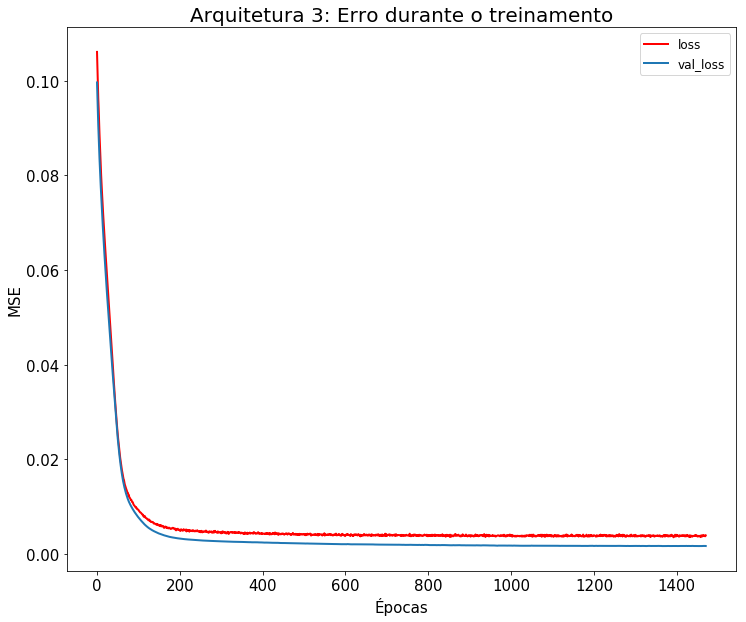

In [39]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history_ae3.history['loss'],color='r',label="loss",linewidth=2)
plt.plot(history_ae3.history['val_loss'],label="val_loss",linewidth=2)
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Arquitetura 3: Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [40]:
np.min(history_ae3.history['loss'])

0.0035658463071255634

In [41]:
np.min(history_ae3.history['val_loss'])

0.0017038895799826657

## Arquitetura 4 :Sem BatchNormalization e com Tanh

In [13]:
# Sem batch e com Tanh
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
encoded1 = Dense(encoding_dim1,activation="tanh")(entrada)
dp2 = Dropout(0.1)(encoded1) 
encoded2 = Dense(encoding_dim1,activation="tanh")(dp2)
decoded = Dense(input_dim,activation="sigmoid")(encoded2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
# Cria o modelo para a rede anteriormente montada
ae4 = Model(entrada,decoded)

In [15]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
ae4.compile(optimizer='adam', loss='mse')

In [16]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history_ae4 = ae4.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_split=0.3,
                callbacks=[es])

Instructions for updating:
Use tf.cast instead.
Train on 1800 samples, validate on 772 samples
Epoch 1/10000
1800/1800 [==============================] - 2s 1ms/step - loss: 0.0809 - val_loss: 0.0777
Epoch 2/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0757 - val_loss: 0.0726
Epoch 3/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0708 - val_loss: 0.0677
Epoch 4/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0662 - val_loss: 0.0632
Epoch 5/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0618 - val_loss: 0.0589
Epoch 6/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0580 - val_loss: 0.0550
Epoch 7/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0543 - val_loss: 0.0515
Epoch 8/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0509 - val_loss: 0.0482
Epoch 9/10000
1800/1800 [==============================] -

1800/1800 [==============================] - 0s 14us/step - loss: 0.0189 - val_loss: 0.0178
Epoch 76/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0187 - val_loss: 0.0177
Epoch 77/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0186 - val_loss: 0.0176
Epoch 78/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0185 - val_loss: 0.0174
Epoch 79/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0184 - val_loss: 0.0173
Epoch 80/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0182 - val_loss: 0.0171
Epoch 81/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0182 - val_loss: 0.0170
Epoch 82/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0179 - val_loss: 0.0168
Epoch 83/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0178 - val_loss: 0.0167
Epoch 84/10000
1800/1800 [===========================

1800/1800 [==============================] - 0s 14us/step - loss: 0.0115 - val_loss: 0.0102
Epoch 152/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0113 - val_loss: 0.0102
Epoch 153/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0112 - val_loss: 0.0101
Epoch 154/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0112 - val_loss: 0.0100
Epoch 155/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0111 - val_loss: 0.0100
Epoch 156/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0111 - val_loss: 0.0100
Epoch 157/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0110 - val_loss: 0.0099
Epoch 158/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0110 - val_loss: 0.0099
Epoch 159/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0110 - val_loss: 0.0098
Epoch 160/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 12us/step - loss: 0.0088 - val_loss: 0.0075
Epoch 228/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0086 - val_loss: 0.0074
Epoch 229/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0087 - val_loss: 0.0074
Epoch 230/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0086 - val_loss: 0.0074
Epoch 231/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0087 - val_loss: 0.0073
Epoch 232/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0086 - val_loss: 0.0073
Epoch 233/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0086 - val_loss: 0.0073
Epoch 234/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0085 - val_loss: 0.0072
Epoch 235/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0085 - val_loss: 0.0072
Epoch 236/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0064 - val_loss: 0.0051
Epoch 304/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0064 - val_loss: 0.0051
Epoch 305/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0062 - val_loss: 0.0051
Epoch 306/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0063 - val_loss: 0.0050
Epoch 307/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0063 - val_loss: 0.0050
Epoch 308/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0063 - val_loss: 0.0050
Epoch 309/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0062 - val_loss: 0.0050
Epoch 310/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0063 - val_loss: 0.0050
Epoch 311/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0062 - val_loss: 0.0049
Epoch 312/10000
1800/1800 [==================

1800/1800 [==============================] - 0s 17us/step - loss: 0.0052 - val_loss: 0.0040
Epoch 380/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0051 - val_loss: 0.0040
Epoch 381/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0051 - val_loss: 0.0040
Epoch 382/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0051 - val_loss: 0.0040
Epoch 383/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0051 - val_loss: 0.0040
Epoch 384/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0051 - val_loss: 0.0040
Epoch 385/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0051 - val_loss: 0.0039
Epoch 386/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0051 - val_loss: 0.0039
Epoch 387/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0051 - val_loss: 0.0039
Epoch 388/10000
1800/1800 [==================

1800/1800 [==============================] - 0s 10us/step - loss: 0.0043 - val_loss: 0.0031
Epoch 456/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0043 - val_loss: 0.0031
Epoch 457/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0042 - val_loss: 0.0031
Epoch 458/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0043 - val_loss: 0.0031
Epoch 459/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0042 - val_loss: 0.0031
Epoch 460/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0042 - val_loss: 0.0031
Epoch 461/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0042 - val_loss: 0.0031
Epoch 462/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0042 - val_loss: 0.0030
Epoch 463/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0030
Epoch 464/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 10us/step - loss: 0.0038 - val_loss: 0.0026
Epoch 532/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0038 - val_loss: 0.0026
Epoch 533/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0037 - val_loss: 0.0025
Epoch 534/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0025
Epoch 535/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0037 - val_loss: 0.0025
Epoch 536/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0036 - val_loss: 0.0025
Epoch 537/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0037 - val_loss: 0.0025
Epoch 538/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0037 - val_loss: 0.0025
Epoch 539/10000
1800/1800 [==============================] - 0s 8us/step - loss: 0.0037 - val_loss: 0.0025
Epoch 540/10000
1800/1800 [===================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0033 - val_loss: 0.0022
Epoch 608/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0034 - val_loss: 0.0022
Epoch 609/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0033 - val_loss: 0.0022
Epoch 610/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0034 - val_loss: 0.0022
Epoch 611/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0033 - val_loss: 0.0022
Epoch 612/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0033 - val_loss: 0.0022
Epoch 613/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0022
Epoch 614/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0033 - val_loss: 0.0022
Epoch 615/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0034 - val_loss: 0.0022
Epoch 616/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 12us/step - loss: 0.0031 - val_loss: 0.0019
Epoch 684/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0030 - val_loss: 0.0019
Epoch 685/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0031 - val_loss: 0.0019
Epoch 686/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0019
Epoch 687/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0032 - val_loss: 0.0019
Epoch 688/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0031 - val_loss: 0.0019
Epoch 689/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0031 - val_loss: 0.0019
Epoch 690/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0031 - val_loss: 0.0019
Epoch 691/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0031 - val_loss: 0.0019
Epoch 692/10000
1800/1800 [==================

1800/1800 [==============================] - 0s 10us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 760/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 761/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0030 - val_loss: 0.0018
Epoch 762/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0030 - val_loss: 0.0018
Epoch 763/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0030 - val_loss: 0.0018
Epoch 764/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 765/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0028 - val_loss: 0.0018
Epoch 766/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0030 - val_loss: 0.0018
Epoch 767/10000
1800/1800 [==============================] - 0s 8us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 768/10000
1800/1800 [==================

1800/1800 [==============================] - 0s 12us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 836/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0029 - val_loss: 0.0017
Epoch 837/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0030 - val_loss: 0.0017
Epoch 838/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0029 - val_loss: 0.0017
Epoch 839/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 840/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 841/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 842/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 843/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 844/10000
1800/1800 [==================

Epoch 911/10000
1800/1800 [==============================] - 0s 8us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 912/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 913/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 914/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 915/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 916/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 917/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 918/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 919/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 920/10000
1800/1800 [==

Epoch 987/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 988/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0028 - val_loss: 0.0015
Epoch 989/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 990/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 991/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 992/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0028 - val_loss: 0.0015
Epoch 993/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 994/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 995/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 996/10000
1800/1800 [=

1800/1800 [==============================] - 0s 13us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1063/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0027 - val_loss: 0.0014
Epoch 1064/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1065/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0027 - val_loss: 0.0014
Epoch 1066/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0027 - val_loss: 0.0014
Epoch 1067/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0027 - val_loss: 0.0014
Epoch 1068/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1069/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1070/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1071/10000
1800/1800 [==========

1800/1800 [==============================] - 0s 10us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1138/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1139/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1140/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 1141/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1142/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1143/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1144/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 1145/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0027 - val_loss: 0.0014
Epoch 1146/10000
1800/1800 [========

1800/1800 [==============================] - 0s 10us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1213/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1214/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1215/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 1216/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 1217/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 1218/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1219/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1220/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1221/10000
1800/1800 [========

1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1288/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0026 - val_loss: 0.0013
Epoch 1289/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1290/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1291/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.0013
Epoch 1292/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1293/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1294/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1295/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.0013
Epoch 1296/10000
1800/1800 [========

1800/1800 [==============================] - 0s 10us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1363/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1364/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1365/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1366/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1367/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1368/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1369/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0026 - val_loss: 0.0013
Epoch 1370/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.0013
Epoch 1371/10000
1800/1800 [==========

1800/1800 [==============================] - 0s 17us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1438/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1439/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1440/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0026 - val_loss: 0.0013
Epoch 1441/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1442/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.0013
Epoch 1443/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1444/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1445/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1446/10000
1800/1800 [========

1800/1800 [==============================] - 0s 14us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1513/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1514/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1515/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1516/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1517/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1518/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1519/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1520/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1521/10000
1800/1800 [=========

1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 1588/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1589/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1590/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 1591/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1592/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1593/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1594/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1595/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1596/10000
1800/1800 [=========

1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 1663/10000
1800/1800 [==============================] - 0s 8us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 1664/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 1665/10000
1800/1800 [==============================] - 0s 8us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1666/10000
1800/1800 [==============================] - 0s 8us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1667/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1668/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1669/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1670/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1671/10000
1800/1800 [============

1800/1800 [==============================] - 0s 11us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 1738/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 1739/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 1740/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 1741/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1742/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 1743/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 1744/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 1745/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1746/10000
1800/1800 [==========

1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1813/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 1814/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1815/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1816/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1817/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1818/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 1819/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0021 - val_loss: 0.0011
Epoch 1820/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 1821/10000
1800/1800 [========

1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 1888/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 1889/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 1890/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 1891/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 1892/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 1893/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 0.0010
Epoch 1894/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 1895/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 1896/10000
1800/1800 [========

1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.9736e-04
Epoch 1963/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0023 - val_loss: 9.9561e-04
Epoch 1964/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 1965/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 1966/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 1967/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.9883e-04
Epoch 1968/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.9831e-04
Epoch 1969/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 1970/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 1971/10000
180

1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 9.9429e-04
Epoch 2036/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.8222e-04
Epoch 2037/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 9.8385e-04
Epoch 2038/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.8738e-04
Epoch 2039/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.8132e-04
Epoch 2040/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0023 - val_loss: 9.8143e-04
Epoch 2041/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.8241e-04
Epoch 2042/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.8991e-04
Epoch 2043/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0022 - val_loss: 9.8400e-04


1800/1800 [==============================] - 0s 10us/step - loss: 0.0021 - val_loss: 9.8453e-04
Epoch 2108/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0022 - val_loss: 9.7525e-04
Epoch 2109/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 9.7204e-04
Epoch 2110/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 9.7104e-04
Epoch 2111/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 9.6971e-04
Epoch 2112/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 9.7611e-04
Epoch 2113/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0021 - val_loss: 9.7469e-04
Epoch 2114/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.7232e-04
Epoch 2115/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.7685e-04
E

1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.6967e-04
Epoch 2180/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0021 - val_loss: 9.6529e-04
Epoch 2181/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 9.7053e-04
Epoch 2182/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.6865e-04
Epoch 2183/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.6697e-04
Epoch 2184/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.7355e-04
Epoch 2185/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.6664e-04
Epoch 2186/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.6423e-04
Epoch 2187/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.6699e-04
E

1800/1800 [==============================] - 0s 11us/step - loss: 0.0021 - val_loss: 9.6042e-04
Epoch 2252/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.6323e-04
Epoch 2253/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.6003e-04
Epoch 2254/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0021 - val_loss: 9.5327e-04
Epoch 2255/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.4819e-04
Epoch 2256/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.5742e-04
Epoch 2257/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0021 - val_loss: 9.6834e-04
Epoch 2258/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.5995e-04
Epoch 2259/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.5732e-04


1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.5627e-04
Epoch 2324/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 9.4813e-04
Epoch 2325/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.5231e-04
Epoch 2326/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0021 - val_loss: 9.5596e-04
Epoch 2327/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.5207e-04
Epoch 2328/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.4735e-04
Epoch 2329/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.5284e-04
Epoch 2330/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.5487e-04
Epoch 2331/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 9.5377e-04


Epoch 2396/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0021 - val_loss: 9.4469e-04
Epoch 2397/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.4577e-04
Epoch 2398/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0022 - val_loss: 9.4677e-04
Epoch 2399/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.4536e-04
Epoch 2400/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0021 - val_loss: 9.4650e-04
Epoch 2401/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 9.4077e-04
Epoch 2402/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 9.4067e-04
Epoch 2403/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.4567e-04
Epoch 2404/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_

1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 9.3945e-04
Epoch 2469/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0022 - val_loss: 9.4107e-04
Epoch 2470/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 9.4778e-04
Epoch 2471/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0022 - val_loss: 9.4711e-04
Epoch 2472/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 9.3584e-04
Epoch 2473/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.4043e-04
Epoch 2474/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.4044e-04
Epoch 2475/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.4083e-04
Epoch 2476/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.4245e-04


1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.4095e-04
Epoch 2541/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 9.3682e-04
Epoch 2542/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0021 - val_loss: 9.4209e-04
Epoch 2543/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 9.4227e-04
Epoch 2544/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.3978e-04
Epoch 2545/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.4153e-04
Epoch 2546/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 9.3845e-04
Epoch 2547/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0021 - val_loss: 9.4120e-04
Epoch 2548/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.4053e-04


1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.3645e-04
Epoch 2613/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0022 - val_loss: 9.3694e-04
Epoch 2614/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.2951e-04
Epoch 2615/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 9.3169e-04
Epoch 2616/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0021 - val_loss: 9.3211e-04
Epoch 2617/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.3463e-04
Epoch 2618/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 9.3003e-04
Epoch 2619/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0021 - val_loss: 9.3181e-04
Epoch 2620/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.2943e-04


1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.2391e-04
Epoch 2685/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 9.2690e-04
Epoch 2686/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 9.2402e-04
Epoch 2687/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.2834e-04
Epoch 2688/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.4039e-04
Epoch 2689/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0021 - val_loss: 9.2592e-04
Epoch 2690/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0021 - val_loss: 9.2027e-04
Epoch 2691/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 9.3000e-04
Epoch 2692/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 9.4413e-04


1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 9.2619e-04
Epoch 2757/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 9.2563e-04
Epoch 2758/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0022 - val_loss: 9.2905e-04
Epoch 2759/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.3065e-04
Epoch 2760/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 9.2473e-04
Epoch 2761/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0022 - val_loss: 9.2276e-04
Epoch 2762/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0023 - val_loss: 9.1982e-04
Epoch 2763/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 9.2229e-04
Epoch 2764/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0021 - val_loss: 9.2697e-04


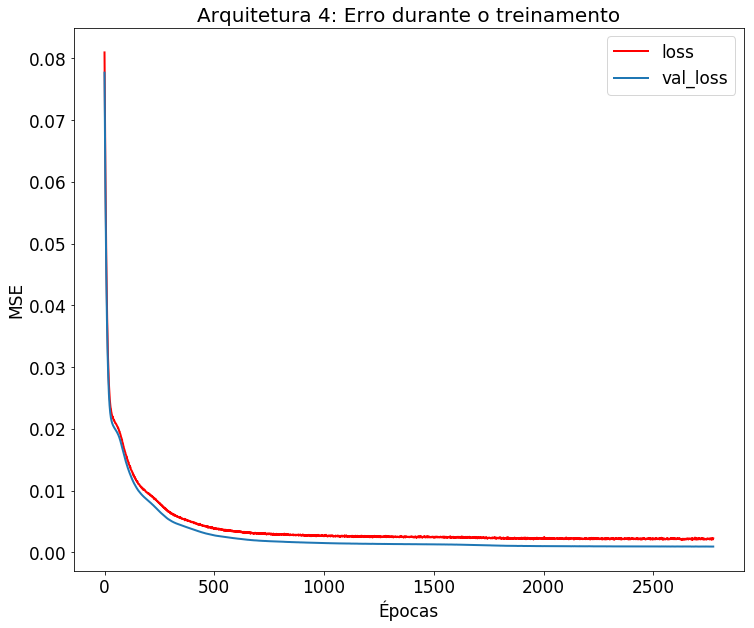

In [57]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=17)
plt.plot(history_ae4.history['loss'],color='r',label="loss",linewidth=2)
plt.plot(history_ae4.history['val_loss'],label="val_loss",linewidth=2)
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Arquitetura 4: Erro durante o treinamento")
plt.rc('font', size=17)
plt.legend()
plt.savefig('erro_ae4.pdf', format="pdf", bbox_inches='tight')
plt.show()

In [18]:
np.min(history_ae4.history['loss'])

0.0020230094108652946

In [19]:
np.min(history_ae4.history['val_loss'])

0.000917593740292347

## Arquitetura 5: BatchNormalization e Tanh

In [49]:
# Rede com duas camadas decodificadas e batch_normalizzation e Tanh
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
batch1 = BatchNormalization()(entrada)
encoded1 = Dense(encoding_dim1,activation="tanh")(batch1)
dp2 = Dropout(0.1)(encoded1) 
encoded2 = Dense(encoding_dim1,activation="tanh")(dp2)
batch2 = BatchNormalization()(encoded2)
decoded = Dense(input_dim,activation="sigmoid")(batch2)

In [50]:
# Cria o modelo para a rede anteriormente montada
ae5 = Model(entrada,decoded)

In [51]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
ae5.compile(optimizer='adam', loss='mse')

In [52]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history_ae5 = ae5.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_split=0.3,
                callbacks=[es])

Train on 1800 samples, validate on 772 samples
Epoch 1/10000
1800/1800 [==============================] - 1s 559us/step - loss: 0.1102 - val_loss: 0.1015
Epoch 2/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.1058 - val_loss: 0.0961
Epoch 3/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.1015 - val_loss: 0.0912
Epoch 4/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0972 - val_loss: 0.0870
Epoch 5/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0934 - val_loss: 0.0829
Epoch 6/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0900 - val_loss: 0.0794
Epoch 7/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0864 - val_loss: 0.0763
Epoch 8/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0836 - val_loss: 0.0735
Epoch 9/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0807 - val_loss: 0.071

1800/1800 [==============================] - 0s 13us/step - loss: 0.0094 - val_loss: 0.0083
Epoch 78/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0092 - val_loss: 0.0080
Epoch 79/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0089 - val_loss: 0.0078
Epoch 80/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0087 - val_loss: 0.0076
Epoch 81/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0086 - val_loss: 0.0074
Epoch 82/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0084 - val_loss: 0.0072
Epoch 83/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0082 - val_loss: 0.0070
Epoch 84/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0081 - val_loss: 0.0068
Epoch 85/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0079 - val_loss: 0.0067
Epoch 86/10000
1800/1800 [==========================

1800/1800 [==============================] - 0s 11us/step - loss: 0.0041 - val_loss: 0.0030
Epoch 154/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0041 - val_loss: 0.0030
Epoch 155/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0029
Epoch 156/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0029
Epoch 157/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0029
Epoch 158/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0041 - val_loss: 0.0029
Epoch 159/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0039 - val_loss: 0.0029
Epoch 160/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0028
Epoch 161/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0039 - val_loss: 0.0028
Epoch 162/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0021
Epoch 230/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0021
Epoch 231/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 232/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 233/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0033 - val_loss: 0.0020
Epoch 234/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 235/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 236/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 237/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 238/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 11us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 306/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0029 - val_loss: 0.0016
Epoch 307/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 308/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0029 - val_loss: 0.0016
Epoch 309/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 310/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 311/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 312/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0029 - val_loss: 0.0016
Epoch 313/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 314/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 29us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 382/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0027 - val_loss: 0.0014
Epoch 383/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0014
Epoch 384/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 385/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0027 - val_loss: 0.0014
Epoch 386/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 387/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 388/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 389/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 390/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 458/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 459/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 460/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 461/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 462/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 463/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 464/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 465/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 466/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 11us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 534/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 535/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 536/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 537/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 538/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 539/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 540/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 541/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 542/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 17us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 610/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 611/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 612/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0025 - val_loss: 0.0010
Epoch 613/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 614/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 615/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 616/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 617/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 618/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 686/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 687/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 688/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 689/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 690/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 691/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 692/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 693/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 694/10000
1800/1800 [=================

Epoch 761/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 762/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 763/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 764/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 765/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 766/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 767/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 768/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 769/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 770/10000
1800/1800 [=

1800/1800 [==============================] - 0s 11us/step - loss: 0.0021 - val_loss: 0.0011
Epoch 837/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 838/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 839/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 840/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 841/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 842/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 843/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 844/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 845/10000
1800/1800 [=================

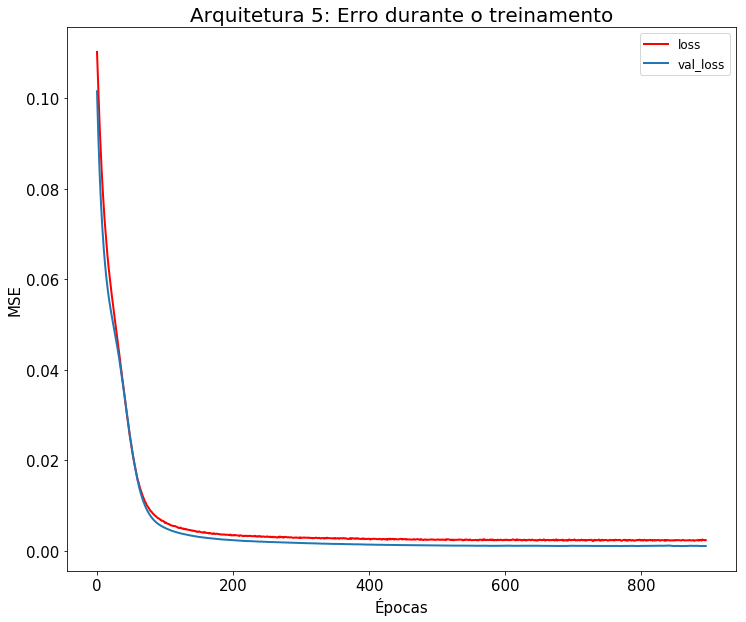

In [53]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history_ae5.history['loss'],color='r',label="loss",linewidth=2)
plt.plot(history_ae5.history['val_loss'],label="val_loss",linewidth=2)
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Arquitetura 5: Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [54]:
np.min(history_ae5.history['loss'])

0.002094039346815811

In [55]:
np.min(history_ae5.history['val_loss'])

0.0009860211785477368

# Teste de Modelo e Estimação de Probabilidade

In [22]:
final_autoencoder = ae4

In [21]:
def distancia(entrada):
    recons = final_autoencoder.predict(entrada)
    return norm(entrada-recons)

In [23]:
# Pn = e^-(||x-x^||)
def estimar_prob1(entrada):
    recons = final_autoencoder.predict(entrada)
    return pow(math.e, -norm(entrada-recons))

In [25]:
# Cria um dicionário com a estimativa e a distância para o gráfico
est_dis = []
j = 0
for i in X_testAtMes.index:
    est_dis.append((estimar_prob1(np.array(X_testAtMes.loc[i]).reshape(1,21))*100,distancia(np.array(X_testAtMes.loc[i]).reshape(1,21))))
est_dis.sort(reverse=True)
est = []
dis = []
for tpl in est_dis:
    p, d = tpl
    est.append(p)
    dis.append(d)

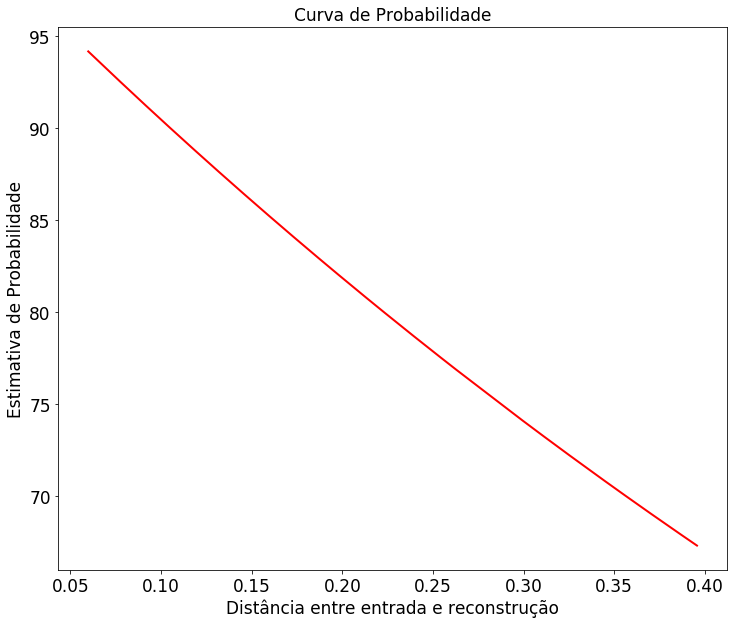

In [58]:
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=17)
plt.rc('font', size=17)
plt.plot(dis,est,color='r',linewidth=2)
plt.xlabel(u'Distância entre entrada e reconstrução')
plt.ylabel('Estimativa de Probabilidade')
plt.title('Curva de Probabilidade')
plt.savefig('curva_probabilidade.pdf', format="pdf", bbox_inches='tight')
plt.show()

# Heatmap do Canadá

In [27]:
X_trainOrigin, X_testOrigin = train_test_split(origin, test_size=0.30, random_state=42)
lng = X_testOrigin['lng']*180/np.pi
lat = X_testOrigin['lat']*180/np.pi
lng = np.array(lng)
lat = np.array(lat)

In [28]:
lon_min=-141.5
lon_max=-54
lat_min=42
lat_max=72

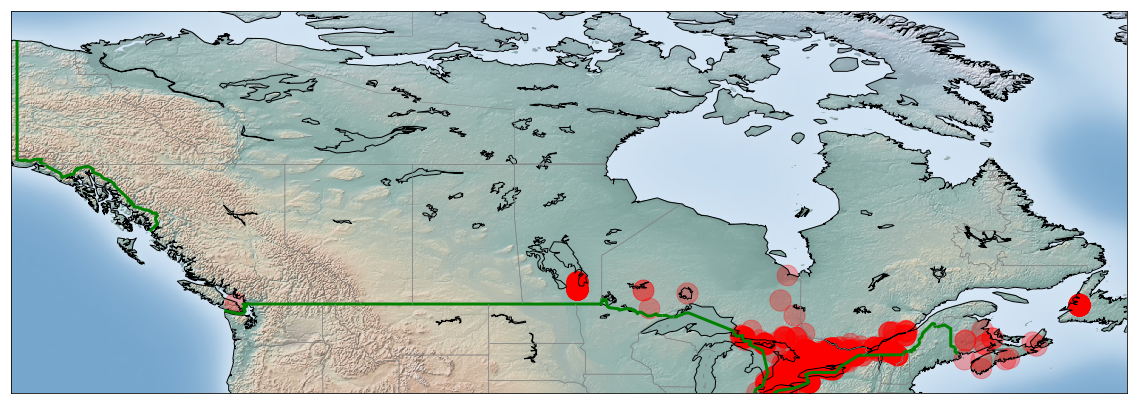

In [73]:
# Mapa com o tamanho do ponto sendo a probabilidade
fig = plt.figure(figsize=(20, 30))
bm = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)
bm.shadedrelief()
bm.drawcoastlines(color='black')
bm.drawcountries(color='green',linewidth=3)
bm.drawstates(color='gray')
for i in range(len(est)):
    bm.scatter(lng[i], lat[i], latlon=True, s=est[i]*5, c='red', alpha=0.3)
plt.title("Mapa de de estimação por tamanho")
plt.show()

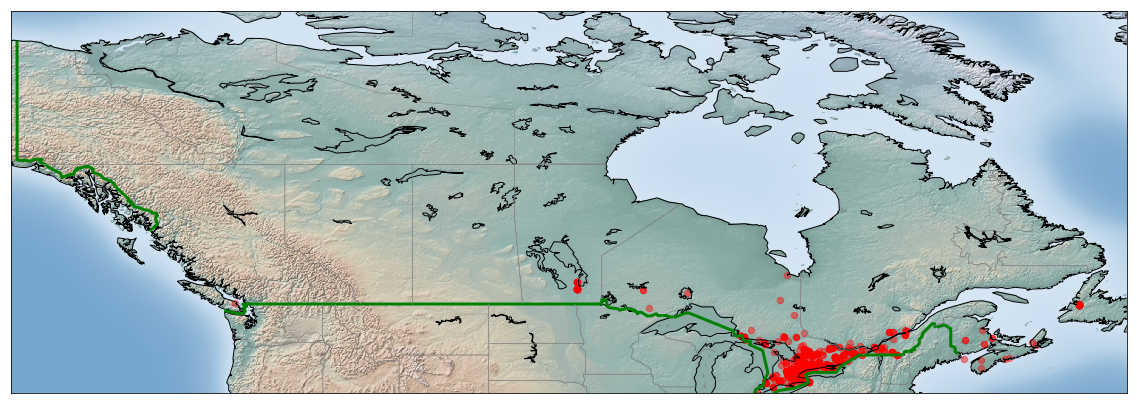

In [77]:
# Mapa com o alpha do ponto sendo a probabilidade
fig = plt.figure(figsize=(20, 30))
bm = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)
bm.shadedrelief()
bm.drawcoastlines(color='black')
bm.drawcountries(color='green',linewidth=3)
bm.drawstates(color='gray')
for i in range(len(est)):
    bm.scatter(lng[i], lat[i], latlon=True, s=40, c='red', alpha=est[i]/200)
plt.title("Mapa de de estimação por transparência")
plt.show()

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

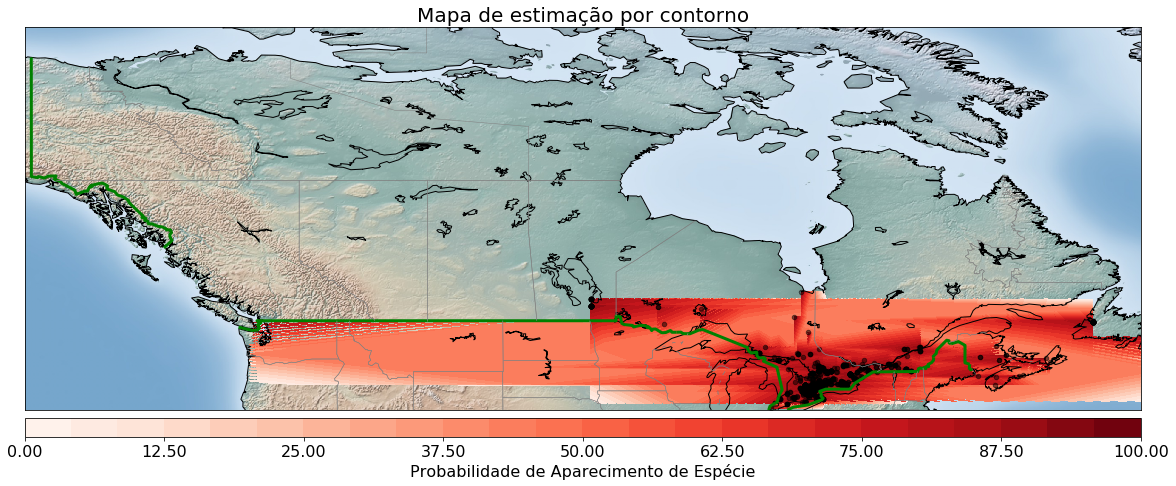

In [31]:
# Mapa feito com contourf
# https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contourf
X, Y = np.meshgrid(lng,lat)
Z = np.diag(est)
fig = plt.figure(figsize=(20, 30))
bm = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)
bm.shadedrelief()
bm.drawcoastlines(color='black')
bm.drawcountries(color='green',linewidth=3)
bm.drawstates(color='gray')

levels = np.linspace(0, 100, 25)
cf = bm.contourf(X, Y, Z,levels,cmap=plt.cm.Reds)
bm.colorbar(cf,location='bottom',format='%.2f', label="Probabilidade de Aparecimento de Espécie")
bm.scatter(lng, lat, latlon=True, s=20, c='black', alpha=0.5)
plt.title("Mapa de estimação por contorno")
plt.show()

# Validação com pontos aleatórios

In [32]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
def sampling(lon_min=-142, lon_max=-53, lat_min=41, lat_max=75, n_points=500):    
    lat = np.array([])
    lon = np.array([])
    pts = 0
    
    bm = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)

    while pts < n_points:
        x = np.random.uniform(lat_min,lat_max,1)
        y = np.random.uniform(lon_max,lon_min,1)
        
        if bm.is_land(y, x):
            lat = np.hstack((lat, x)) 
            lon = np.hstack((lon, y)) 
            pts = pts + 1
        
    return (lat , lon)

In [33]:
rand_lat , rand_lng = sampling(lon_min, lon_max, lat_min, lat_max)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

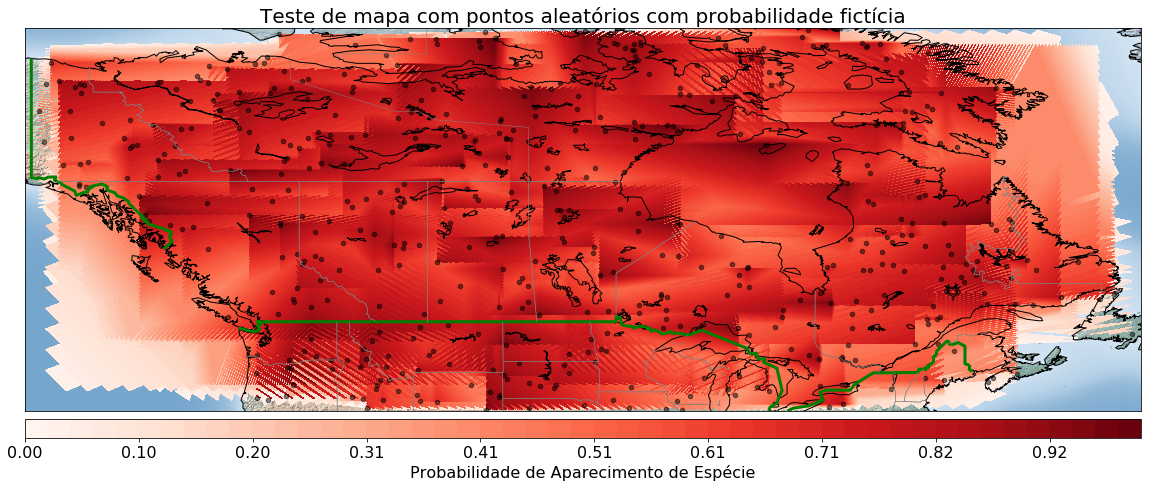

In [42]:
fig = plt.figure(figsize=(20, 30))
bm = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)
bm.shadedrelief()
bm.drawcoastlines(color='black')
bm.drawcountries(color='green',linewidth=3)
bm.drawstates(color='gray')
levels = np.linspace(0, 1, 50)
Z = np.diag(np.random.uniform(0,1,500))
X, Y = np.meshgrid(rand_lng,rand_lat)
cf = bm.contourf(X, Y, Z,levels,cmap=plt.cm.Reds)
bm.colorbar(cf,location='bottom',format='%.2f', label="Probabilidade de Aparecimento de Espécie")
bm.scatter(rand_lng, rand_lat, latlon=True, s=20, c='black', alpha=0.5)
plt.title("Teste de mapa com pontos aleatórios com probabilidade fictícia")
plt.show()

In [51]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
import urllib.request
import json
import csv
import time
# Gera os pontos aleatórios mas só guarda os que possuirem dados no WU
def sampling_collecting(date, lon_min=-142, lon_max=-53, lat_min=41, lat_max=75, n_points=500):    
    lat = np.array([])
    lon = np.array([])
    pts = 0
    key = "c137e42a99ef99f0"
    
    bm = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)

    out = open("validation_points.csv","w")
    fieldnames = ['id','date','lat', 'lng', 'tornado', 'monthtodatesnowfalli', 'thunder', 'meantempi', 'snow', 
                  'meanvism', 'meanwdire', 'minhumidity', 'maxvism', 'since1jancoolingdegreedays', 
                  'coolingdegreedays', 'maxdewptm', 'monthtodatecoolingdegreedays', 'since1sepheatingdegreedays', 
                  'precipi', 'heatingdegreedays', 'meanpressurem', 'since1julsnowfallm', 'monthtodatesnowfallm', 
                  'precipsource', 'rain', 'minwspdm', 'since1sepcoolingdegreedaysnormal', 'meanwindspdi', 
                  'monthtodateheatingdegreedaysnormal', 'snowfallm', 'fog', 'humidity', 'minwspdi', 
                  'meanpressurei', 'gdegreedays', 'since1julheatingdegreedays', 'mindewptm', 'maxwspdi', 
                  'minpressurem', 'coolingdegreedaysnormal', 'maxtempm', 'minvisi', 'meanwindspdm', 'mintempi', 
                  'maxpressurem', 'since1sepheatingdegreedaysnormal', 'hail', 'meandewptm', 'maxwspdm', 
                  'precipm', 'meantempm', 'since1julheatingdegreedaysnormal', 'snowfalli', 
                  'monthtodateheatingdegreedays', 'monthtodatecoolingdegreedaysnormal', 
                  'since1sepcoolingdegreedays', 'maxpressurei', 'minvism', 'minpressurei', 'maxvisi', 
                  'heatingdegreedaysnormal', 'since1jancoolingdegreedaysnormal', 'snowdepthm', 'meanwdird',
                  'meandewpti', 'meanvisi', 'maxhumidity', 'snowdepthi', 'mintempm', 'since1julsnowfalli', 
                  'maxtempi', 'maxdewpti', 'mindewpti']
    writer = csv.DictWriter(out, fieldnames=fieldnames, delimiter = ',')
    writerError = csv.writer(out)
    writer.writeheader()
    i = 0
    print("Iniciando coleta.")
    while pts < n_points:
        y = np.random.uniform(lat_min,lat_max,1)
        x = np.random.uniform(lon_max,lon_min,1)
        
        if bm.is_land(x, y):
            try:
                f = urllib.request.urlopen("http://api.wunderground.com/api/"+key+
                                           "/history_"+date+"/q/"+y+","+x+".json")
                parsed_json = json.loads(f.read())
                if ("history" in parsed_json and 'dailysummary' in parsed_json['history'] and len(parsed_json['history']['dailysummary']) > 0 ):
                    parsed_json['history']['dailysummary'][0]['date'] = date
                    parsed_json['history']['dailysummary'][0]['lat'] = y
                    parsed_json['history']['dailysummary'][0]['lng'] = x
                    writer.writerow(parsed_json['history']['dailysummary'][0])
                    lat = np.hstack((lat, y)) 
                    lon = np.hstack((lon, x)) 
                    pts += 1
                f.close()
                print("Coordenada ok")
            except:
                print("Coordenada sem registro.")
            i += 1
            if (i % 10 == 0 and i != 0 and i != 500):
                print("Limite de 10/min atingido. Aguardando tempo necessário até próxima consulta...")
                for n in range(6, 0, -1):
                    print(str(n)+"0 segundos restantes...")
                    time.sleep(10)
                print("Continuando coleta de dados...")
            elif (i % 500 == 0 and i != 0):
                print("Limite de 500/dia atingido. Aguardando tempo necessário até próxima consulta...")
                for n in range(24, 0, -1):
                    print(str(n),"hora(s) restante(s)...")
                    time.sleep(3600)
                print("Continuando coleta de dados...")
    out.close
    return (lat , lon)

In [52]:
lat , lon = sampling_collecting('20190202',lon_min, lon_max, lat_min, lat_max)

Iniciando coleta.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Limite de 10/min atingido. Aguardando tempo necessário até próxima consulta...
60 segundos restantes...
50 segundos restantes...
40 segundos restantes...
30 segundos restantes...
20 segundos restantes...
10 segundos restantes...
Continuando coleta de dados...
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Coordenada sem registro.
Limite de 10/min atingido. Aguardando tempo necessário até próxima consulta...
60 segundos restantes...
50 segundos restantes...
40 segundos restantes...
30 segundos restantes...
20 segundos restantes...
10 segundos restan

KeyboardInterrupt: 